In [ ]:
pip install pynverse    #install pynverse library which contains inversefunc which is used to calculate the inverse function 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pynverse: filename=pynverse-0.1.4.4-py3-none-any.whl size=6363 sha256=e78fd41b13c73cfd95804272ba61f275c79c8d55597203a6a3f8a3109c15a290
  Stored in directory: /root/.cache/pip/wheels/06/eb/74/006b76fdd8229ed3767fef546c825c2924f1def2d023929d9d
Successfully built pynverse


In [ ]:
#importing the necessary libraries
import numpy as np
from scipy import integrate
import math as m
from pynverse import inversefunc
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#Constants 
H_0=67.7   #Hubble Constant
omega_m=0.31  
omega_l =0.69   #fraction of the energy of the universe due to the cosmological constant
omega_b=0.049   #current baryon mass density fraction of the universe
f_IGM= 0.83     #fraction of baryon mass in IGM
K_IGM=933
m_p=1.67*(10**-27)

In [ ]:
#P(z)=z*exp(-z)    Probabilty Distribution Function for redshift z
PDF= lambda z : z* m.exp(-z)
CDF= lambda z: 1-m.exp(-z)*(z+1)  # Cumulative Distribution Function

U=np.random.uniform(0,0.265,500)   # Generate 500 data points between 0 and 0.8 uniformly
z=[]
for i in range(len(U)):
  inv_CDF = inversefunc(CDF,U[i])  # Calculate the inverse function
  z=np.append(z,inv_CDF)    # Append the values of z in array z[]
z.sort()   #to sort the z array

In [ ]:
# Create three empty array DM_IGM,DM_HG_loc and DM_E for storing the values of DM_IGM,DM_HG_loc and DM_E
DM_IGM=[]
DM_HG_loc=[]
DM_E=[]
function=lambda z:((7/8)*(1+z))/(0.31*pow(1+z,3)+0.69)**0.5
for i in range(0,500):
  Integration=integrate.quad(function,0,z[i])   #integrate.quad function , integrate the given funnction, func from 0 to z
  DM_IGM_f=K_IGM * Integration[0]               #formula to find the value of DM_IGM,integration[0] stores the result of integration of function , func 
  DM_IGM=np.append(DM_IGM,np.random.normal(DM_IGM_f,100))  #introduce a randomness by taking normal distribution N(DM_IGM,100 pc cm^(-3)) in DM_IGM
  DM_HG_loc=np.append(DM_HG_loc,np.random.normal(100,20))   #take DM_HG_loc as normal distribution N(100 pc cm^(-3),20 pc cm^(-3))
  DM_E_formula=DM_IGM[i]+(DM_HG_loc[i]/(1+z[i]))    #formula to calculate value of DM_E
  DM_E=np.append(DM_E,DM_E_formula)

In [ ]:
log_DM_E=np.log10(DM_E)  # np.log10 calculate the log of all the data points in DM_E array and new array created is stored in log_DM_E
log_z=np.log10(z)    # np.log10 calculate the log of all the data points in z array and new array created is stored in log_z
'''
plt.figure(figsize=(10,7))
plt.scatter(log_z,log_DM_E,s=6)
plt.xlabel("log z")
plt.ylabel("log $DM_{E}$")
plt.title("log $DM_{E}$ versus log z")
plt.show()
plt.savefig("500 Samples(z_f=1).jpg")'''

'\nplt.figure(figsize=(10,7))\nplt.scatter(log_z,log_DM_E,s=6)\nplt.xlabel("log z")\nplt.ylabel("log $DM_{E}$")\nplt.title("log $DM_{E}$ versus log z")\nplt.show()\nplt.savefig("500 Samples(z_f=1).jpg")'

[0.32119753 1.07487045 2.98988589]


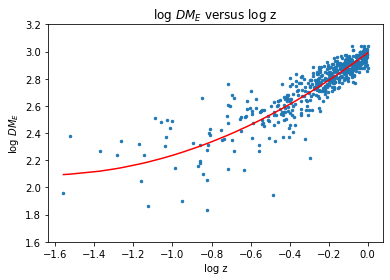

<Figure size 432x288 with 0 Axes>

In [ ]:
poly_deg = 2
p = np.polyfit(log_z,log_DM_E, poly_deg)
print(p)
y_fit = np.poly1d(p) #use np.poly1d to give the polynomial function corresponding to the coeffs. in p

#Plot the data and the fitted function:
plt.plot(log_z, y_fit(log_z), ls='-', label='polynomial of deg. {}'.format(poly_deg),color='red')
plt.ylim(1.6,3.2)
plt.scatter(log_z,log_DM_E,s=6)
plt.xlabel("log z")
plt.ylabel("log $DM_{E}$")
plt.title("log $DM_{E}$ versus log z")
plt.show()
plt.savefig("500 Samples(z_f=1).jpg")

In [ ]:
#function to find chi_square
def find_chi_square(j,k):
  Sum=0   #Sum stores the values of chi_square for each value of K_IGM and Omega_matter 
  for i in range(500):
    func=lambda z:((7/8)*(1+z))/(j*pow(1+z,3)+(1-j))**0.5
    integration=integrate.quad(func,0,z[i])  #integrate.quad function , integrate the given funnction, func from 0 to z
    DM_igm=k * integration[0]   #formula to find the value of DM_IGM,integration[0] stores the result of integration of function , func 
    DM_e= DM_igm+ (102.93/(1+z[i]))   # Value of DM_HG_loc is fixed to 95.76
    formula=pow((DM_E[i]- DM_e),2)/(pow(100,2) +pow((20/(1+z[i])),2))
    Sum=Sum+ formula
  return Sum

In [ ]:
#create an empty array k_igm to store the values of K_IGM (Range : 800 to 1100)
#create an empty array Omega_matter to store the values of Omega_matter (Range : 0.001 to 0.500)
#create an empty array chi to store the chi square value corresponding to each value of K_IGM and Omega_matter
#two parameter fitting using DM_IGM and Omega_matter taking DM_HG_loc constant
k_igm=[]
Omega_matter=[]
chi=[]


for j in range(1,100):
  o_m= j*0.01
  for k in range(800,1100):
    #for l in range(60,120):
        chi_sq=find_chi_square(o_m,k)   #function call 
        chi = np.append(chi,chi_sq)
        k_igm=np.append(k_igm,k)
       
        Omega_matter=np.append(Omega_matter,o_m)
chi_min=min(chi)              #find the minimum value in the chi array and store it in chi_min
index= np.where(chi==chi_min) #find the index where the minimum value is stored in chi array
print(index)
print('k_igm_min:',k_igm[index],'\t','Chi_Square Minimum:',chi_min,'\t','omega_m',Omega_matter[index])     #print the K_IGM and Omega_matter values corresponding to the value of chi square minimum 

(array([14308]),)
k_igm_min: [1008.] 	 Chi_Square Minimum: 494.43668169101323 	 omega_m [0.48]


In [ ]:

d1=np.array([k_igm,Omega_matter]).T   #creating a numpy array of K_igm and Omega_matter
df=pd.DataFrame(data=d1, columns=["k_igm","Omega_matter"])  #create a dataframe using numpy array d1 
df['chi_square']=chi     #add a column chi_square to the dataframe
df

,k_igm,Omega_matter,chi_square
0,800.0,0.01,644.632362
1,801.0,0.01,647.766338
2,802.0,0.01,650.960870
3,803.0,0.01,654.215959
4,804.0,0.01,657.531605
...,...,...,...
29695,1095.0,0.99,616.859946
29696,1096.0,0.99,614.556898
29697,1097.0,0.99,612.277849
29698,1098.0,0.99,610.022799


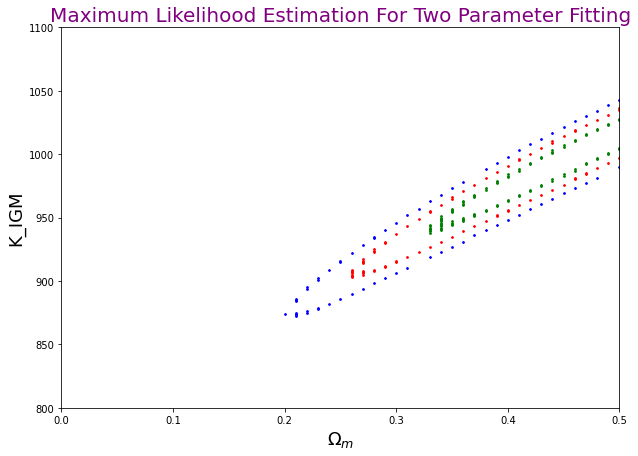

In [ ]:
#to plot the contour plot between K_IGM and Omega_matter 
plt.figure(figsize=(10,7))
for i in range(0,len(chi)):
  if (chi_min+2.3-0.4<=chi[i]<=chi_min+2.3+0.4):
    plt.scatter(df["Omega_matter"][i],df["k_igm"][i],color="green",s=3)  #plot the points (colour:green) which lies between 1-sigma 
  if (chi_min+6.17-0.4<=chi[i]<=chi_min+6.17+0.4):
    plt.scatter(df["Omega_matter"][i],df["k_igm"][i],color="red",s=3)  #plot the points (colour:red) which lies between 2-sigma 
  if (chi_min+11.8-0.4<=chi[i]<=chi_min+11.8+0.4):
    plt.scatter(df["Omega_matter"][i],df["k_igm"][i],color="blue",s=3)  #plot the points (colour:blue) which lies between 3-sigma 
  


# Plot
plt.scatter(k_igm[index],Omega_matter[index],color='black')

plt.xlabel(r'$\Omega_m$',size='18')
plt.ylabel('K_IGM',size='18')
plt.title('Maximum Likelihood Estimation For Two Parameter Fitting',color='purple',size='20')
plt.xlim(0.00,0.50)  #define the range of x axis
plt.ylim(800,1100)   #define the range of y axis
plt.show()

In [ ]:
#function to find the chi square
def find_chi_square1(j,l):
  Sum=0     #Sum stores the values of chi_square for each value of DM_HG_loc and Omega_matter `
  for i in range(500):
    func=lambda z:((7/8)*(1+z))/(j*pow(1+z,3)+(1-j))**0.5
    integration=integrate.quad(func,0,z[i])   #integrate.quad function , integrate the given funnction, func from 0 to z
    #taking the value of k_igm as 937.05
    DM_igm=931.04* integration[0]      #formula to find the value of DM_IGM,integration[0] stores the result of integration of function , func 
    DM_e= DM_igm+ (l/(1+z[i]))     #formula of DM_E
    formula=pow((DM_E[i]- DM_e),2)/(pow(100,2) +pow((20/(1+z[i])),2))
    Sum=Sum+ formula
  return Sum

In [ ]:
#create an empty array DM_HG_loc to store the values of DM_HG_loc (Range : 50 to 160)
#create an empty array Omega_matter_1 to store the values of Omega_matter (Range : 0.001 to 0.500)
#create an empty array chi_1 to store the chi square value corresponding to each value of DM_HG_loc and Omega_matter
#two parameter fitting using DM_HG_loc and Omega_matter taking DM_IGM constant

DM_hg_loc=[]
Omega_matter_1=[]
chi_1=[]


for j in range(1,500):
  o_m_1= j*0.001
  #for k in range(800,1100):
  for l in range(60,120):
        chi_sq_1=find_chi_square1(o_m_1,l)    #function call 
        chi_1= np.append(chi_1,chi_sq_1)   #append the values chi_square into chi_1
        DM_hg_loc=np.append(DM_hg_loc,l)     #append the values DM_HG_loc into DM_HG_loc array
        Omega_matter_1=np.append(Omega_matter_1,o_m_1)    #append the value of Omega_matter into Omega_matter_1 array
chi_min_1=min(chi_1)       #find the minimum value in the chi_1 array and store it in chi_min
index_1= np.where(chi_1==chi_min_1)    #find the index where the minimum value is stored in chi array
print(index_1)
print('Chi_Square Minimum:',chi_min_1,'\t','omega_m',Omega_matter_1[index_1],'\tDM_HG_loc',DM_hg_loc[index_1])     #print the DM_HG_loc and Omega_matter values corresponding to the value of chi square minimum    

(array([20459]),)
Chi_Square Minimum: 494.0822283458817 	 omega_m [0.341] 	DM_HG_loc [119.]


In [ ]:
d2=np.array([DM_hg_loc,Omega_matter_1]).T       #creating a numpy array of DM_HG_loc and Omega_matter
df2=pd.DataFrame(data=d2, columns=["DM_HG_loc","Omega_matter"])       #create a dataframe using numpy array d2
df2['chi_square']=chi_1       #add a column chi_square to the dataframe
display(df2)

,DM_HG_loc,Omega_matter,chi_square
0,60.0,0.001,1433.717437
1,61.0,0.001,1438.615495
2,62.0,0.001,1443.555030
3,63.0,0.001,1448.536039
4,64.0,0.001,1453.558525
...,...,...,...
29935,115.0,0.499,583.608236
29936,116.0,0.499,581.424860
29937,117.0,0.499,579.282959
29938,118.0,0.499,577.182535


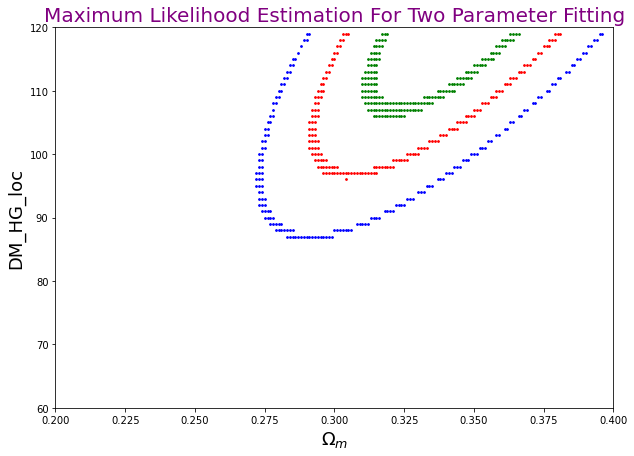

In [ ]:
#to plot the contour plot between DM_HG_loc and Omega_matter
plt.figure(figsize=(10,7))
for i in range(0,len(chi_1)):
  if (chi_min_1+2.3-0.4<=chi_1[i]<=chi_min_1+2.3+0.4):
    plt.scatter(df2["Omega_matter"][i],df2["DM_HG_loc"][i],color="green",s=3)       #plot the points (colour:green) which lies between 1-sigma 
  if (chi_min_1+6.17-0.4<=chi_1[i]<=chi_min_1+6.17+0.4):
    plt.scatter(df2["Omega_matter"][i],df2["DM_HG_loc"][i],color="red",s=3)         #plot the points (colour:red) which lies between 2-sigma 
  if (chi_min_1+11.8-0.4<=chi_1[i]<=chi_min_1+11.8+0.4):
    plt.scatter(df2["Omega_matter"][i],df2["DM_HG_loc"][i],color="blue",s=3)        #plot the points (colour:blue) which lies between 3-sigma 
  


#Plot
plt.scatter(DM_hg_loc[index_1],Omega_matter_1[index_1],color='black')
plt.xlabel(r'$\Omega_m$',size='18')
plt.ylabel('DM_HG_loc',size='18')
plt.title('Maximum Likelihood Estimation For Two Parameter Fitting',color='purple',size='20')
plt.xlim(0.2,0.4)   #define the range of x axis
plt.ylim(60,120)    #define the range of y axis
plt.show()

In [ ]:
#function to find the chi square
def find_chi_square2(k,l):
  Sum=0         #Sum stores the values of chi_square for each value of DM_HG_loc and  K_IGM
  for i in range(500):
    func=lambda z:((7/8)*(1+z))/(0.31*pow(1+z,3)+(1-0.31))**0.5
    integration=integrate.quad(func,0,z[i])          #integrate.quad function , integrate the given funnction, func from 0 to z 
    DM_igm=k* integration[0]               #formula to find the value of DM_IGM, integration[0] stores the result of integration of function , func
    DM_e= DM_igm+ (l/(1+z[i]))                 #formula of DM_E
    formula=pow((DM_E[i]- DM_e),2)/(pow(100,2) +pow((20/(1+z[i])),2))
    Sum=Sum+ formula
  return Sum

In [ ]:
# Create an empty array DM_HG_loc_1 to store the values of DM_HG_loc (Range : 60 to 120)
# Create an empty array k_igm_1 to store the values of K_IGM (Range : 800 to 1100)
# Create an empty array chi_2 to store the chi square value corresponding to each value of DM_HG_loc and k_igm
# Two parameter fitting using DM_HG_loc and k_igm taking Omega_matter constant


DM_hg_loc_1=[]
k_igm_1=[]
chi_2=[]


for k in range(800,1100):
  for l in range(60,120):
        chi_sq_2=find_chi_square2(k,l)   # Function call 
        chi_2= np.append(chi_2,chi_sq_2)    # Append the values chi_square into chi_2
        k_igm_1=np.append(k_igm_1,k)       # Append the values k_igm into k_igm_1 array
        DM_hg_loc_1=np.append(DM_hg_loc_1,l)        # Append the value of Omega_matter into DM_hg_loc_1 array
        
chi_min_2=min(chi_2)              # Find the minimum value in the chi_1 array and store it in chi_min
index_2= np.where(chi_2==chi_min_2)            # Find the index where the minimum value is stored in chi array
print(index_2)
print('Chi_Square Minimum:',chi_min_2,'\t','K_IGM',k_igm_1[index_2],'\tDM_HG_loc',DM_hg_loc_1[index_2])      # Print the DM_HG_loc and k_igm values corresponding to the value of chi square minimum    

(array([7079]),)
Chi_Square Minimum: 494.55271185067556 	 K_IGM [917.] 	DM_HG_loc [119.]


In [ ]:
d3=np.array([DM_hg_loc_1,k_igm_1]).T    # Creating a numpy array of DM_hg_loc and K_igm  
df3=pd.DataFrame(data=d3, columns=["DM_HG_loc","K_IGM"])     # Create a dataframe using numpy array d3
df3['chi_square']=chi_2     # Add a column chi_square to the dataframe
display(df3)

,DM_HG_loc,K_IGM,chi_square
0,60.0,800.0,1077.780256
1,61.0,800.0,1071.265189
2,62.0,800.0,1064.791597
3,63.0,800.0,1058.359481
4,64.0,800.0,1051.968841
...,...,...,...
17995,115.0,1099.0,1120.676619
17996,116.0,1099.0,1126.615647
17997,117.0,1099.0,1132.596150
17998,118.0,1099.0,1138.618130


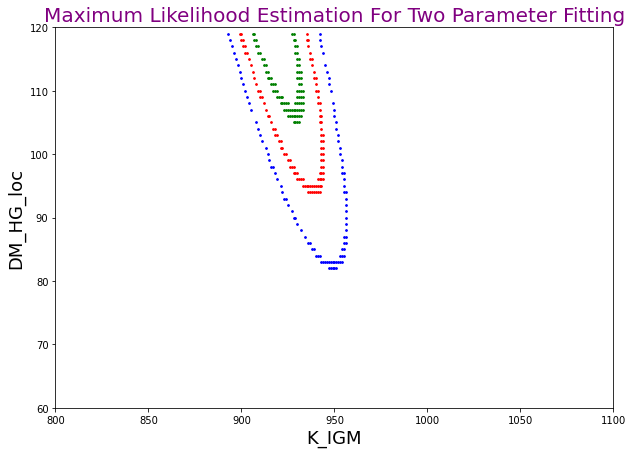

In [ ]:
# To plot the contour plot between DM_HG_loc and K_IGM
plt.figure(figsize=(10,7))
for i in range(0,len(chi_2)):
  if (chi_min_2+2.3-0.4<=chi_2[i]<=chi_min_2+2.3+0.4):
    plt.scatter(df3["K_IGM"][i],df3["DM_HG_loc"][i],color="green",s=3)   # Plot the points (colour:green) which lies between 1-sigma 
  if (chi_min_2+6.17-0.4<=chi_2[i]<=chi_min_2+6.17+0.4):
    plt.scatter(df3["K_IGM"][i],df3["DM_HG_loc"][i],color="red",s=3)  # Plot the points (colour:red) which lies between 2-sigma 
  if (chi_min_2+11.8-0.4<=chi_2[i]<=chi_min_2+11.8+0.4):
    plt.scatter(df3["K_IGM"][i],df3["DM_HG_loc"][i],color="blue",s=3)   # Plot the points (colour:blue) which lies between 3-sigma 
 


#Plot
plt.scatter(DM_hg_loc_1[index_2],k_igm_1[index_2],color='black')
plt.xlim(800,1100)    # Define the range of x-axis
plt.ylim(60,120)     # Define the range of y-axis
plt.xlabel('K_IGM',size='18')
plt.ylabel('DM_HG_loc',size='18')
plt.title('Maximum Likelihood Estimation For Two Parameter Fitting',color='purple',size='20')

plt.show()